# Scales Aesthetics
- scales() family of functions
- Generic code: scale_[aesthetic]_[vector type]
- To adjust the x-axis scale for a continuous variable, use scale_x_continuous
- Can also be used to chage the scale label, breaks...
- For mapping data that is in the date format, use scale_x_date() or scale_x_datetime() functions

|    Parameter   |          Description           |
|:---------------|:-------------------------------|
| name           |Label or legend name            |
| breaks         |Vector of breaks points         |
| minor_breaks   |Vector of minor break points    |
| labels         |Labels to use for each break    |
| limits         |Limits to the range of the axis |

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(ggthemes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



#### Load data

In [2]:
worldcup <- read_csv("Data/worldcup.csv")

worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Name = player_name)

head(worldcup)


Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


### Example 1: World Cup 2010 data
- Plot of Time vs Passes for the "worldcup" dataset
- Number of Shots taken is represented by Size
- Position is represented by Color


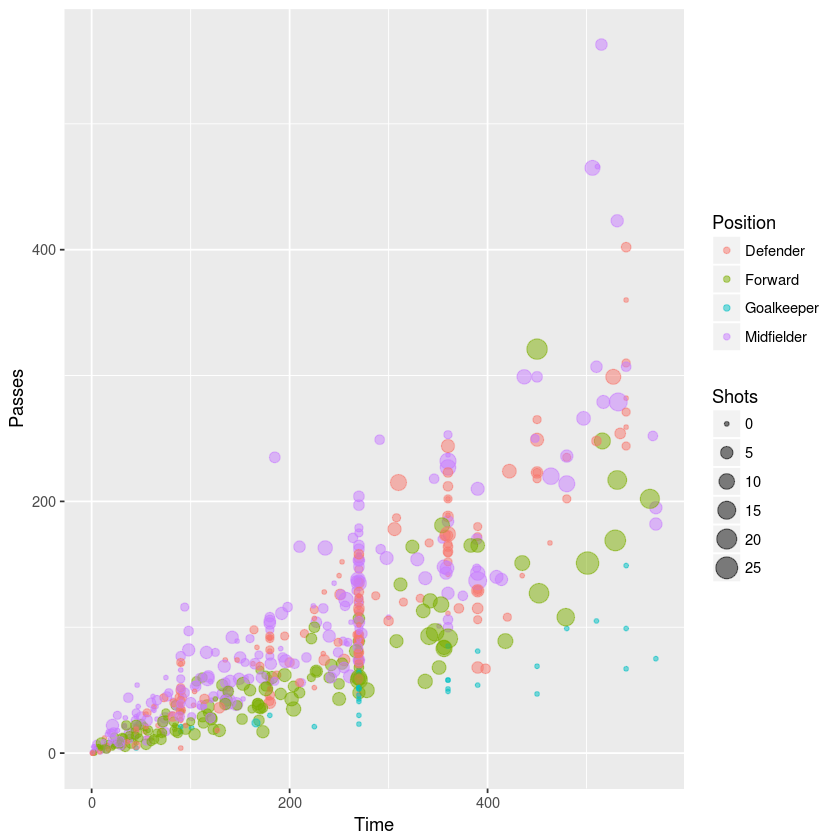

In [3]:
worldcup %>%
  ggplot() +
  geom_point(aes(x = Time, y = Passes, color = Position, size = Shots), alpha = 0.5)

### Customize the x-axis:
- Use scale_x_continues() function, because aesthetic mapping is continuous (mapped to Time)
- Change the x-axis Title
- Show breaks at every 90 minutes (average time of each game)

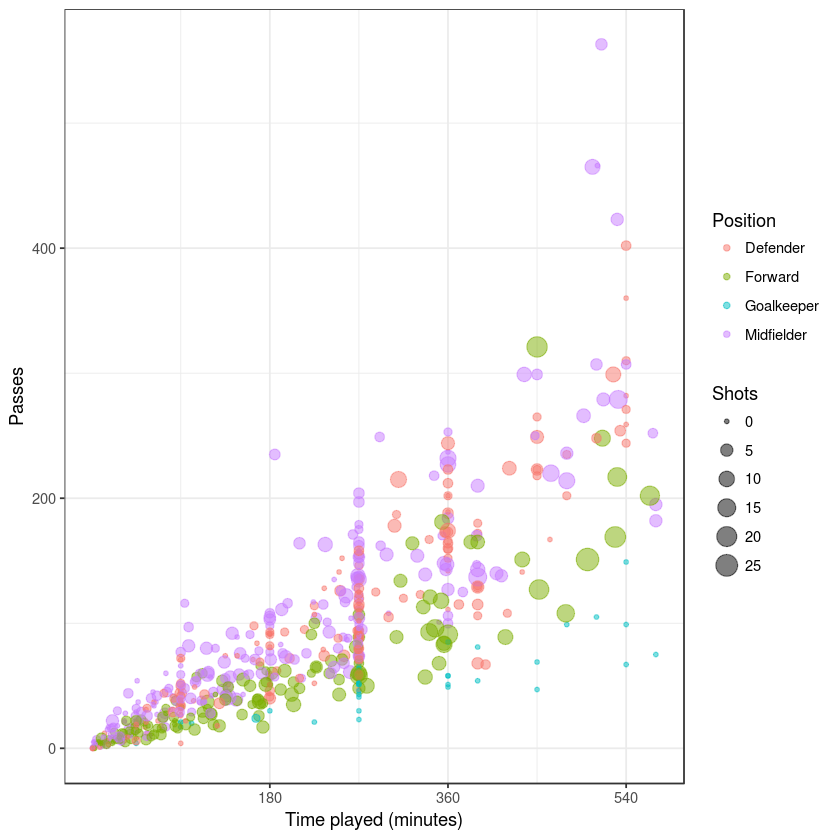

In [4]:
worldcup %>%
  ggplot() +
  theme_bw() +
  geom_point(aes(x = Time, y = Passes, color = Position, size = Shots), alpha = 0.5) +
  scale_x_continuous(name= "Time played (minutes)", breaks = 90 * c(2,4,6), minor_breaks = 90 * c(1, 3, 5))

### Costomize the Legends:
- Change the "Shots" title to "Shots on Goal"
- Show only size for 0, 10 and 20 Shots
- Data on Shots is mapped to the Size aesthetic and is continuous
- Use scale_size_continuous() function

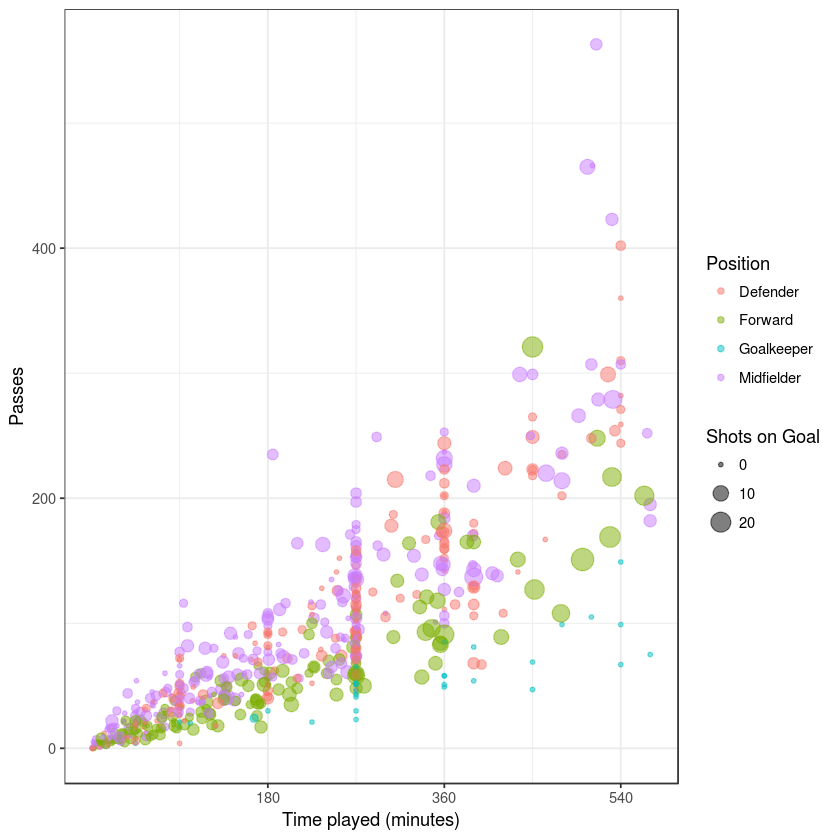

In [5]:
worldcup %>%
  ggplot() +
  theme_bw() +
  geom_point(aes(x = Time, y = Passes, color = Position, size = Shots), alpha = 0.5) +
  scale_x_continuous(name= "Time played (minutes)", breaks = 90 * c(2,4,6), minor_breaks = 90 * c(1, 3, 5)) +
  scale_size_continuous(name = "Shots on Goal", breaks = c(0, 10, 20))